In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pylab as plt

In [2]:
class System:
    def __init__(self, alpha=0.005, zeta=0.1, rho=0.5, sigma=0.01, pi=0, beta=0.0095, delta=0.0001, kappa=0.1, gamma=0.01):
        self.alpha = alpha; self.zeta=zeta; self.rho=rho; self.sigma=sigma; self.pi=pi; self.beta=beta; self.delta=delta; self.kappa=kappa; self.gamma=gamma
    def __call__(self, y, t):
        S = y[0]; I = y[1]; Z = y[2]; R = y[3]; Q = y[4]
        dS = self.pi - self.beta*S*Z - self.delta*S
        dI = self.beta*S*Z - self.rho*I - self.delta*I - self.kappa*I
        dZ = self.rho*I + self.zeta*R - self.alpha*S*Z - self.sigma*Z
        dR = self.delta*S + self.delta*I + self.alpha*S*Z - self.zeta*R + self.gamma*Q
        dQ = self.kappa*I + self.sigma*Z - self.gamma*Q
        return (dS, dI, dZ, dR, dQ)

In [3]:
solution = np.empty((100, 6))
solution[:, 0] = np.linspace(0, 50, solution.shape[0])

S0=500; I0=0; Z0=0; R0=0; Q0=0
solution[:, 1:] = scipy.integrate.odeint(System(), [S0,I0,Z0,R0,Q0], solution[:, 0])

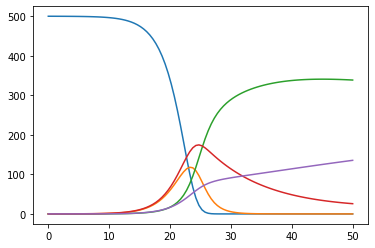

In [4]:
plt.plot(solution[:, 0], solution[:, 1:])
plt.show()